<a href="https://www.kaggle.com/code/rawahanakhuda/python-machine-learning-project?scriptVersionId=176793881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Python Machine Learning Project

Author: Rawaha Nakhuda

---

# Classification Project using Random Forests

This project was done as part of the [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) by Jose Portilla on Udemy. 

For this project, publicly available data from [LendingClub.com](www.lendingclub.com) will be explored. Lending Club connects people who need money (borrowers) with people who have money (investors). This project will aim to study the dataset and use machine learning models to help predict whether a borrower would pay people back.

Data from 2007-2010 will be used to try to classify and predict whether or not the borrower paid back their loan in full. The data can be downloaded from [here](https://www.lendingclub.com/info/download-data.action). 

The columns represent the following:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Get the Data


In [2]:
df = pd.read_csv('../input/loan-data-lending-club/loan_data.csv')

**Explore and view the dataset:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

To proceed, let's explore the dataset with some basic data visualization to understand trends and the data in more detail. 

 **1. We need to understand how a person classifies for a loan in the first place and figure out how that correspond toa person eventually paying it back.**
 
One such measure is the FICO score. Let's visualize how that relates to the credit.policy and the not.fully.paid columns.

Text(0.5, 8.95999999999998, 'FICO')

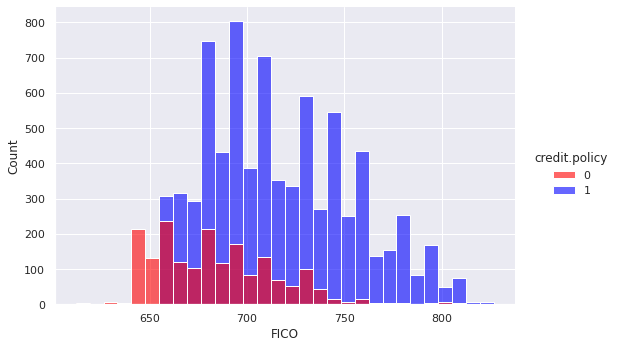

In [6]:
sns.set_theme()
sns.displot(df, x = 'fico', hue ='credit.policy', bins = 30, aspect = 1.5, palette = ['red', 'blue'], alpha = 0.6)
plt.xlabel('FICO')

Text(0.5, 8.95999999999998, 'FICO')

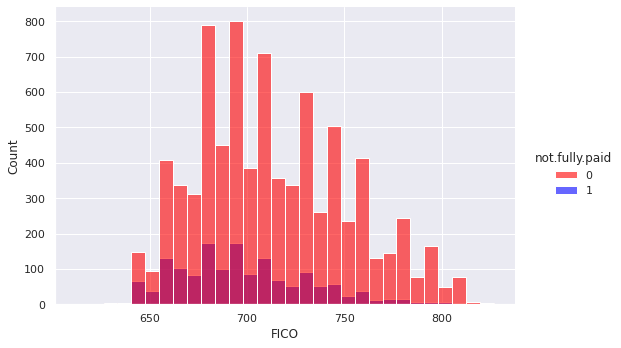

In [7]:
sns.displot(df, x = 'fico', hue ='not.fully.paid', bins = 30, aspect = 1.5, palette = ['red', 'blue'], alpha = 0.6,)
plt.xlabel('FICO')

**Takeaways:**
* There is a clear threshold that relates FICO score to credit policy. We can see that customers with a FICO score of approx 660 or below were denied loans.
* However, the customers who did not pay back loans were much more varied, and had high FICO scores as well.

**2. Figure which loans were most popular and which had high rates of customers not fully paying back:**

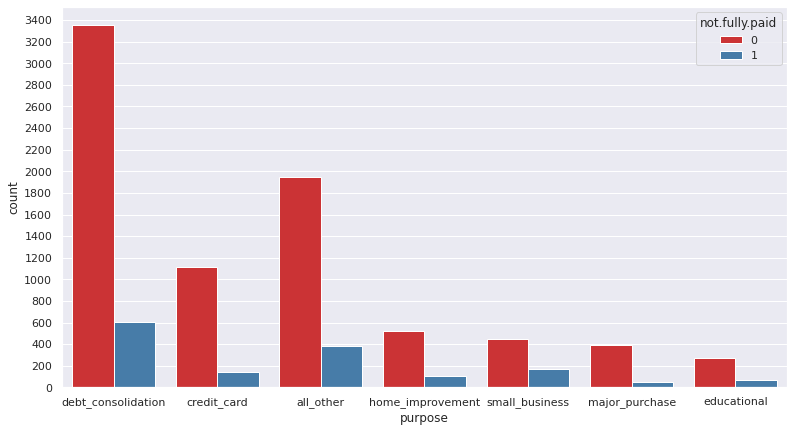

In [8]:
plt.figure(figsize=(13, 7))
sns.countplot(x = 'purpose',data=df, hue = 'not.fully.paid', palette = 'Set1')
plt.yticks(np.arange(0, 3600, step=200));

**Takeaways:**
* Debt consolidation is by far the most popular purpose for taking a loan.
* However, it can be seen that there is no specific loan which has a high percentage of not fully paid. 


**3. Understand the role of interest rates and check relation between interest rates, FICO scores, credit policy and whether they fully paid back loans or not:**

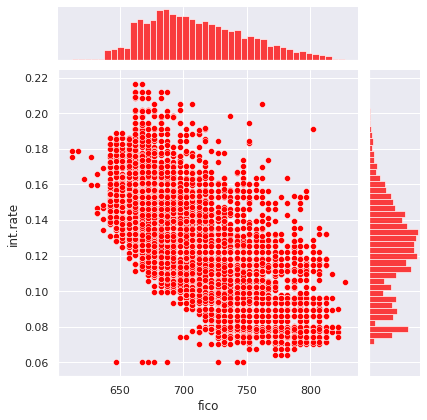

In [9]:
sns.jointplot(x='fico', y ='int.rate', data = df, color = 'red')

<Figure size 864x576 with 0 Axes>

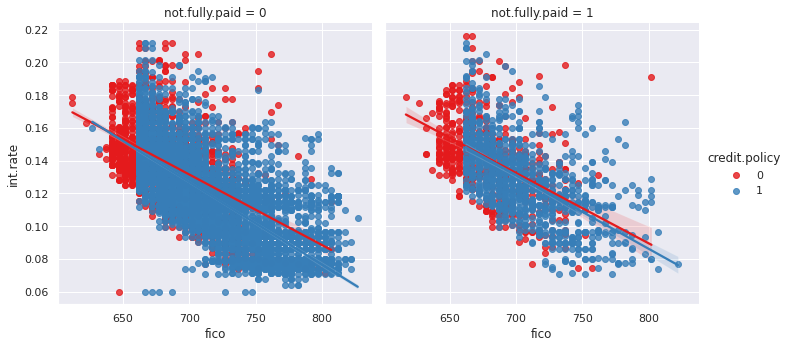

In [10]:
#Create an lmplot to notice difference between fully paid and credit policy
plt.figure(figsize=(12,8))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1' )

**Takeaways:**
* Higher FICO scores generally led to lower interest rates. 
* It can be noticed that those who have paid off the loans are uniformly distributed with low and high FICO scores and interest rates. However, those who did not fully pay back generally had lower FICO scores.

# Setting up the Data

Setting up data for the Classification Model!


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

The **purpose** column is categorical, this means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [12]:
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats = ['purpose']
# Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe
#that has new feature columns with dummy variables. Set this dataframe as final_data. #
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation - Decision Tree


In [19]:
# Create predictions from the test set and create a classification report and a confusion matrix.
pred = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [22]:
print(confusion_matrix(y_test,pred))

[[2225  425]
 [ 398  113]]


## Training the Random Forest model


In [23]:
#Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=600)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation - Random Forests

Let's predict off the y_test values and evaluate our model.



In [26]:
# Predict the class of not.fully.paid for the X_test data.
pred_2 = rfc.predict(X_test)

## Creating a Classificiation Report

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.35      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.51      0.47      3161
weighted avg       0.76      0.84      0.77      3161



In [29]:
## Show the Confusion Matrix for the predictions
print(confusion_matrix(y_test,pred_2))

[[2633   17]
 [ 502    9]]


**Comparing Decision Trees vs Random Forests:**

* Neither did particularly well, more feature engineering is required.
* On average, the random forests model did better, especially in class 0 range.
* However, in class 1, the random forests did poorly, so it depends on what we are trying to optimize. 